# **CH.SC.U4CSE23239 - Support Vector Machines - Example**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
from google.colab import files

uploaded = files.upload()
data = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


In [ ]:
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','DiabetesPedigreeFunction','BloodPressure']
X = data[feature_cols]
y = data.Outcome

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(537, 7)

(537,)

(231, 7)

(231,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
model = SVC(kernel='rbf', random_state = 0)
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)
print('svc_prediction : ',svc_pred)

svc_prediction :  [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_pred)
print('SVC [ kernel - rgf]')
print('Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_pred)
print('Accuracy Score : ',Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_pred,y_test))

SVC [ kernel - rgf]
Confusion Matrix : 
 [[135  25]
 [ 22  49]]
Accuracy Score :  0.7965367965367965
Accuracy in Percentage :  79 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.69      0.66      0.68        74

    accuracy                           0.80       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.79      0.80      0.80       231



[Text(0.5, 1.0, 'SVC [rbf]')]

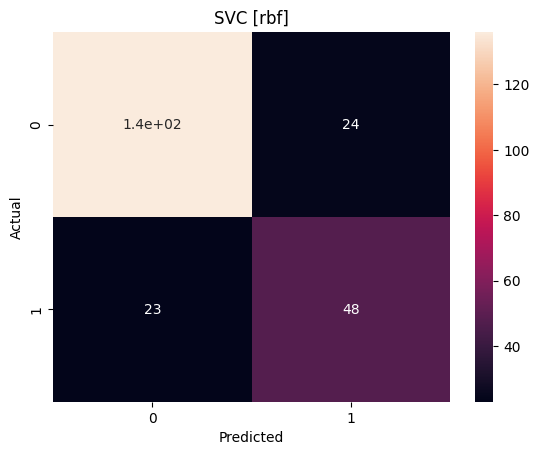

In [ ]:
conf_mat = pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title = 'SVC [rbf]')

In [ ]:
model = SVC(kernel='linear', random_state = 0)
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)
print('svc_prediction : ',svc_pred)

svc_prediction :  [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, svc_pred)
print('SVC [ kernel - linear]')
print('Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_pred)
print('Accuracy Score : ',Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_pred,y_test))

SVC [ kernel - linear]
Confusion Matrix : 
 [[136  24]
 [ 23  48]]
Accuracy Score :  0.7965367965367965
Accuracy in Percentage :  79 %
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       159
           1       0.68      0.67      0.67        72

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



[Text(0.5, 1.0, 'SVC [linear]')]

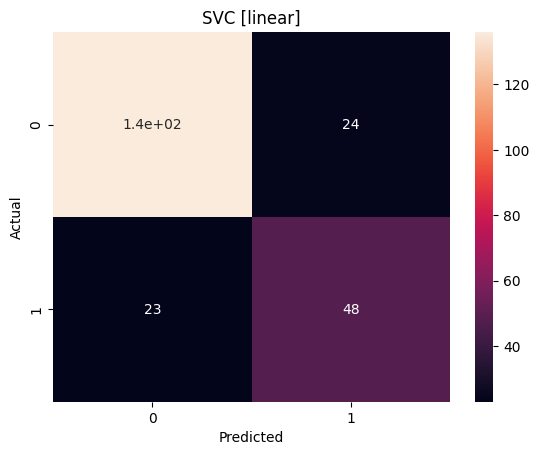

In [ ]:
conf_mat = pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title = 'SVC [linear]')